# Test Case Examples

##### Import Statements

In [7]:
import evacnx as ex
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd
import contextily as cx

## Test Case 1: Lyons, Colorado

### Evacuation Plans

#### Initial Evacuation Plan

In [2]:
location = 'Lyons Colorado'
sup_dem_nodes = [(1,-4000),(30,4000),(4,-4000),(40,4000)]
G = ex.construct_orig_graph(location,sup_dem_nodes)
fire_origin_radii = [(40.227381,-105.261359,0.05),(40.231862,-105.266485,0.09),(40.228941,-105.264405,0.09),(40.233535,-105.262882,0.07)]

num_time_ints, max_flow, flow_dict, ten_s_t_flow, ten_s_t, rmvd_nodes_mat, edge_dist_mat, fire_poly_mat = ex.det_num_int(G, 1000, fire_origin_radii)
print('Number of Time Intervals:',num_time_ints)
print('Flow Value:', max_flow)

Add Super Source and Sink Time:  0.005906820297241211
Add Super Source and Sink Time:  0.012008428573608398
Number of Time Intervals: 25
Flow Value: 8000.0


#### Update to Evaucation Plan

In [3]:
time_int_update = 5
fire_time_int = 15
fire_origin_radii_update = [(40.227381,-105.261359,0.1),(40.231862,-105.266485,0.14),(40.228941,-105.264405,0.2),(40.233535,-105.262882,0.11)]
part_ten_s_t, rmvd_nodes_mat_update, edge_dist_mat_update, fire_mat_poly_update, flow_dict_part, flow_value_part = ex.evac_update(ten_s_t, G, 
                                                                                  rmvd_nodes_mat, edge_dist_mat, fire_poly_mat, time_int_update, 
                                                                                  fire_time_int, num_time_ints, fire_origin_radii_update, flow_dict)

flow_dict_copy = flow_dict.copy()
flow_dict_part_copy = flow_dict_part.copy()
del flow_dict_part_copy[0]
merged_dicts = ex.merge_flow_dicts(flow_dict_copy, flow_dict_part_copy)

merged_tens = ex.merg_tens(ten_s_t.copy(), part_ten_s_t.copy())
colored_max_flow_ten_merg = ex.color_max_flow(merged_tens.copy(),merged_dicts)

Add Super Source and Sink Time:  0.0040187835693359375
Evacuation Plan Successfully Updated


### Plotting

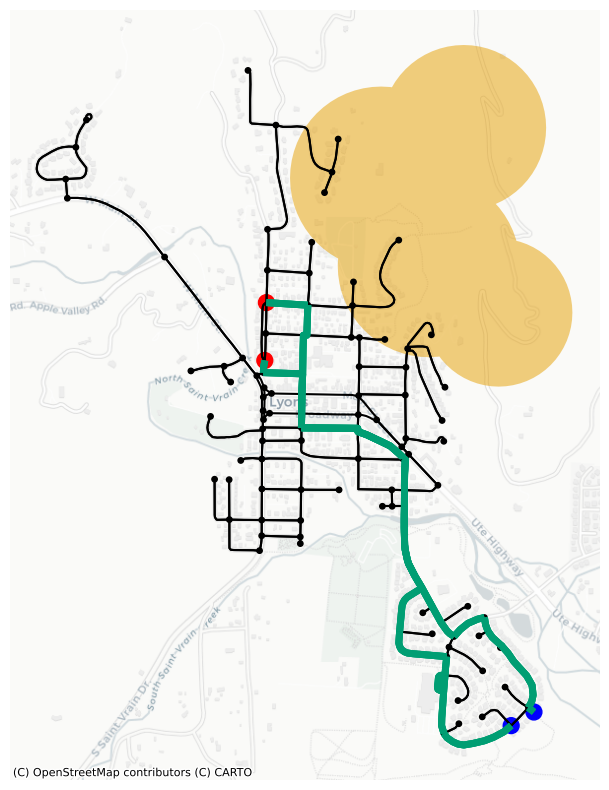

In [8]:
end_time_int = 24
orig_graph = G

##### for orignal evac plan plots
fire = fire_poly_mat
flow_graph = ten_s_t_flow

##### for updated evac plan plots
# fire = fire_mat_poly_update
# flow_graph = colored_max_flow_ten_merg

####get data for plotting
orig_nodes_len =len(orig_graph.nodes)
flow_edges = [(x[0],x[1]) for x in flow_graph.edges(data = True) if flow_graph[x[0]][x[1]]['color'] == (1,0,0)]
flow_edges.sort(key=lambda tup: tup[0])
orig_flow_edges = ex.flow_at_time_int(flow_graph, flow_edges, orig_graph, end_time_int+1)
sup_dem_colors=['blue' if y['sup_dem'] < 0 else 'red' if y['sup_dem'] > 0 else 'black' for x,y in orig_graph.nodes(data=True)]
size =[ 130 if y['sup_dem'] != 0 else 15 for x,y in orig_graph.nodes(data=True)]

####transform orignal graph data for plotting purposes
gdf_nodes = ox.utils_graph.graph_to_gdfs(orig_graph, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=True)
orig_crs = gdf_nodes.crs 
gwm_nodes = gdf_nodes.to_crs(epsg=3857)
gdf_edges = ox.utils_graph.graph_to_gdfs(orig_graph, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=True)
gwm_edges = gdf_edges.to_crs(epsg=3857)

####plot everything
fig, ax= plt.subplots(figsize=(10, 10))
#### use to zoom in on certain areas of plot
# ax.set_xlim(-11719000, -11718000)  # Set x-axis limits
# ax.set_ylim(4898700, 4899200)

gwm_edges.plot(figsize=(10, 10), alpha=1, edgecolor = 'k',ax = ax)

for edge in orig_flow_edges:
    gdf_selected_edge = gwm_edges[gwm_edges.index.isin([edge])]
    gdf_selected_edge.plot(ax=ax, color='#009E73', linewidth=5)

if fire[end_time_int].geom_type == 'Polygon':
    ext = gpd.GeoSeries(fire[end_time_int])
    ext.crs = orig_crs
    gdf = gpd.GeoDataFrame(geometry=ext).to_crs(epsg=3857)
    x,y = Polygon(gdf['geometry'].iloc[0]).exterior.xy
    ax.fill(x,y,'#E69F00', alpha = 0.5)
else:
    for geom in fire[end_time_int].geoms:  
        ext = gpd.GeoSeries(geom)
        ext.crs = orig_crs
        gdf = gpd.GeoDataFrame(geometry=ext).to_crs(epsg=3857)
        xs, ys = Polygon(gdf['geometry'].iloc[0]).exterior.xy    
        ax.fill(xs, ys, alpha=0.5, fc='#E69F00', ec='none')


gwm_nodes.plot(figsize=(10, 10), alpha=1, color = [sup_dem_colors[node] for node in gwm_nodes.index], 
               markersize = [size[node] for node in gwm_nodes.index] ,ax=ax)
#### add base map as background
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)

ax.axis('off')
plt.show()

## Test Case 2: Butte County, California

### Evacuations

#### Initial Evacuation Plan

In [ ]:
location_2 = 'Butte County California'
sup_dem_nodes_2 = [(800,-500),(4650,-1000),(4060,900),(4050,600)]
G_2 = ex.construct_orig_graph(location_2,sup_dem_nodes_2,tolerance = 50)
fire_origin_radii_2 = [(39.783537, -121.533280, 1.25)] #### locations based on camp fire (2018)

num_time_ints_2, max_flow_2, flow_dict_2, ten_s_t_flow_2, ten_s_t_2, rmvd_nodes_mat_2, edge_dist_mat_2, fire_poly_mat_2 = ex.det_num_int(G_2, 1000, fire_origin_radii_2)
print('Number of Time Intervals:',num_time_ints_2)
print('Flow Value:', max_flow_2)

#### Updated Evacuation Plan

In [ ]:
#### Not used in paper
time_int_update_2 = 5
fire_time_int_2 = 15
fire_origin_radii_update_2 = [(39.783537, -121.533280, 1.5), (39.769283, -121.547236, 0.6)]
part_ten_s_t_2, fire_mat_poly_update_2, flow_dict_part_2, flow_value_part_ = ex.evac_update(ten_s_t_2, G_2, rmvd_nodes_mat_2, edge_dist_mat_2, time_int_update, 
                                                                                  fire_time_int_2, num_time_ints_2, fire_origin_radii_update_2, flow_dict_2)

flow_dict_copy_2 = flow_dict_2.copy()
flow_dict_part_copy_2 = flow_dict_part_2.copy()
del flow_dict_part_copy_2[0]
merged_dicts_2 = ex.merge_flow_dicts(flow_dict_copy_2, flow_dict_part_copy_2)

merged_tens_2 = ex.merg_tens(ten_s_t_2.copy(), part_ten_s_t_2.copy())
colored_max_flow_ten_merg_2 = ex.color_max_flow(merged_tens_2.copy(),merged_dicts_2)

### Plotting

In [ ]:
end_time_int = 53
orig_graph = G_2

##### for orignal evac plan plots
fire = fire_poly_mat_2
flow_graph = ten_s_t_flow_2

##### for updated evac plan plots
# fire = fire_mat_poly_update_2
# flow_graph = colored_max_flow_ten_merg_2

####get data for plotting
orig_nodes_len =len(orig_graph.nodes)
flow_edges = [(x[0],x[1]) for x in flow_graph.edges(data = True) if flow_graph[x[0]][x[1]]['color'] == (1,0,0)]
flow_edges.sort(key=lambda tup: tup[0])
orig_flow_edges = ex.flow_at_time_int(flow_graph, flow_edges, orig_graph, end_time_int+1)
sup_dem_colors=['blue' if y['sup_dem'] < 0 else 'red' if y['sup_dem'] > 0 else 'black' for x,y in orig_graph.nodes(data=True)]
size =[ 70 if y['sup_dem'] != 0 else 2 for x,y in orig_graph.nodes(data=True)]

####transform orignal graph data for plotting purposes
gdf_nodes = ox.utils_graph.graph_to_gdfs(orig_graph, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=True)
orig_crs = gdf_nodes.crs 
gwm_nodes = gdf_nodes.to_crs(epsg=3857)
gdf_edges = ox.utils_graph.graph_to_gdfs(orig_graph, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=True)
gwm_edges = gdf_edges.to_crs(epsg=3857)

####plot everything
fig, ax= plt.subplots(figsize=(10, 10))
####used to zoom in on area of plot
ax.set_xlim(-13540000, -13527500)  # Set x-axis limits
ax.set_ylim(4825500, 4837000)  # Set y-axis limits

gwm_edges.plot(alpha=1, edgecolor = 'k', ax = ax, zorder = 2)

for edge in orig_flow_edges:
    gdf_selected_edge = gwm_edges[gwm_edges.index.isin([edge])]
    gdf_selected_edge.plot(ax=ax, color='#009E73', linewidth=4, zorder = 5)

if fire[end_time_int].geom_type == 'Polygon':
    ext = gpd.GeoSeries(fire[end_time_int])
    ext.crs = orig_crs
    gdf = gpd.GeoDataFrame(geometry=ext).to_crs(epsg=3857)
    x,y = Polygon(gdf['geometry'].iloc[0]).exterior.xy
    ax.fill(x,y,'#E69F00', alpha = 0.5, zorder = 5)
else:
    for geom in fire[end_time_int].geoms:  
        ext = gpd.GeoSeries(geom)
        ext.crs = orig_crs
        gdf = gpd.GeoDataFrame(geometry=ext).to_crs(epsg=3857)
        xs, ys = Polygon(gdf['geometry'].iloc[0]).exterior.xy    
        ax.fill(xs, ys, alpha=0.5, fc='#E69F00', ec='none')


gwm_nodes.plot(figsize=(10, 10), alpha=1, color = [sup_dem_colors[node] for node in gwm_nodes.index], 
               markersize = [size[node] for node in gwm_nodes.index] ,ax=ax, zorder = 3)
#### add map to background
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron, zorder = 1)

ax.axis('off')
plt.show()

## Test Case 3: Alexandroupolis Greece

### Evacuations

#### Initial Evacuation Plan

In [ ]:
location_3 = ox.geocode_to_gdf("Alexandroupolis Greece")
sup_dem_nodes_3 = [(1429,1500),(1360,2500),(1345,1000),(10,-5000)]
G_3 = ex.construct_orig_graph(location_3,sup_dem_nodes_3, distance = 5000)
fire_origin_radii_3 = [(40.870672, 25.841544, 0.1), (40.877797, 25.845477, 0.2), (40.884672, 25.859978,0.25)]

num_time_ints_3, max_flow_3, flow_dict_3, ten_s_t_flow_3, ten_s_t_3, rmvd_nodes_mat_3, edge_dist_mat_3, fire_poly_mat_3 = ex.det_num_int(G_3, 1000, fire_origin_radii_3)
print('Number of Time Intervals:',num_time_ints_3)
print('Flow Value:', max_flow_3)

#### Updated Evacuation Plan

In [ ]:
### 2 Updates
time_ints_3 = [5,15]
fire_times_3 = [10,20]
fires = [[(40.870672, 25.841544, 0.2), (40.877797, 25.845477, 0.3), (40.884672, 25.859978,0.35)],
         [(40.870672, 25.841544, 0.25), (40.877797, 25.845477, 0.35), (40.884672, 25.859978,0.5), (40.877326, 25.921328,0.45)]]
nodes_mat = rmvd_nodes_mat_3.copy()
edges_mat = edge_dist_mat_3.copy()
fire_mat = fire_poly_mat_3.copy()
orig_net = ten_s_t_3.copy()
flow = flow_dict_3.copy()
for i in range(len(time_ints_3)):
    time_int_update_3 = time_ints_3[i]
    fire_time_int_3 = fire_times_3[i]
    fire_origin_radii_update_3 = fires[i]
    part_ten_s_t_3, rmvd_nodes_mat_update_3, edge_dist_mat_update_3, fire_mat_poly_update_3, flow_dict_part_3, flow_value_part_3 = ex.evac_update(orig_net,
                                                                                          G_3, nodes_mat, edges_mat, fire_mat,
                                                                                          time_int_update_3, fire_time_int_3, num_time_ints_3, 
                                                                                          fire_origin_radii_update_3, flow)

    flow_dict_copy_3 = flow_dict_3.copy()
    flow_dict_part_copy_3 = flow_dict_part_3.copy()
    del flow_dict_part_copy_3[0]
    merged_dicts_3 = ex.merge_flow_dicts(flow_dict_copy_3, flow_dict_part_copy_3)
    flow = merged_dicts_3.copy()

    merged_tens_3 = ex.merg_tens(orig_net.copy(), part_ten_s_t_3.copy())
    
    orig_net = merged_tens_3.copy()
    nodes_mat = rmvd_nodes_mat_update_3.copy()
    edges_mat = edge_dist_mat_update_3.copy()
    fire_mat = fire_mat_poly_update_3.copy()
colored_max_flow_ten_merg_3 = ex.color_max_flow(orig_net.copy(),flow)

### Plotting

In [ ]:
end_time_int = 58
orig_graph = G_3

##### for orignal evac plan plots
fire = fire_poly_mat_3
flow_graph = ten_s_t_flow_3

##### for updated evac plan plots
# fire = fire_mat_poly_update_3
# flow_graph = colored_max_flow_ten_merg_3

####get data for plotting
orig_nodes_len =len(orig_graph.nodes)
flow_edges = [(x[0],x[1]) for x in flow_graph.edges(data = True) if flow_graph[x[0]][x[1]]['color'] == (1,0,0)]
flow_edges.sort(key=lambda tup: tup[0])
orig_flow_edges = ex.flow_at_time_int(flow_graph, flow_edges, orig_graph, end_time_int+1)
sup_dem_colors=['blue' if y['sup_dem'] < 0 else 'red' if y['sup_dem'] > 0 else 'black' for x,y in orig_graph.nodes(data=True)]
size =[ 70 if y['sup_dem'] != 0 else 2 for x,y in orig_graph.nodes(data=True)]


####transform orignal graph data for plotting purposes
gdf_nodes = ox.utils_graph.graph_to_gdfs(orig_graph, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=True)
orig_crs = gdf_nodes.crs 
gwm_nodes = gdf_nodes.to_crs(epsg=3857)
gdf_edges = ox.utils_graph.graph_to_gdfs(orig_graph, nodes=False, edges=True, node_geometry=True, fill_edge_geometry=True)
gwm_edges = gdf_edges.to_crs(epsg=3857)

####plot everything
fig, ax= plt.subplots(figsize=(10, 10))
### use to zoom in on aprt of plot
# ax.set_xlim(2883000, 2885000)  # Set x-axis limits
# ax.set_ylim(4994250, 4995800)  # Set y-axis limits

gwm_edges.plot(figsize=(10, 10), alpha=1, edgecolor = 'k',linewidth = 2, ax = ax)

for edge in orig_flow_edges:
    gdf_selected_edge = gwm_edges[gwm_edges.index.isin([edge])]
    gdf_selected_edge.plot(ax=ax, color='#009E73', linewidth=4)

if fire[end_time_int].geom_type == 'Polygon':
    ext = gpd.GeoSeries(fire[end_time_int])
    ext.crs = orig_crs
    gdf = gpd.GeoDataFrame(geometry=ext).to_crs(epsg=3857)
    x,y = Polygon(gdf['geometry'].iloc[0]).exterior.xy
    ax.fill(x,y,'#E69F00', alpha = 0.5)
else:
    for geom in fire[end_time_int].geoms:  
        ext = gpd.GeoSeries(geom)
        ext.crs = orig_crs
        gdf = gpd.GeoDataFrame(geometry=ext).to_crs(epsg=3857)
        xs, ys = Polygon(gdf['geometry'].iloc[0]).exterior.xy    
        ax.fill(xs, ys, alpha=0.5, fc='#E69F00', ec='none')


gwm_nodes.plot(figsize=(10, 10), alpha=1, color = [sup_dem_colors[node] for node in gwm_nodes.index], 
               markersize = [size[node] for node in gwm_nodes.index] ,ax=ax)
#### map as background
cx.add_basemap(ax, source = cx.providers.CartoDB.Positron)

ax.axis('off')
plt.show()